# KNN - Manual

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [2]:
# Seed
np.random.seed(101)

In [3]:
# HyperParameters
num_features = 2
n_class = 2
num_points = 300

In [4]:
# Generate data
x, y_true = make_classification(n_samples=num_points, n_features = num_features, n_redundant=0, n_informative=2, n_clusters_per_class=n_class)

In [5]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(x, y_true, test_size=0.3, random_state=101)

Text(0, 0.5, 'x2')

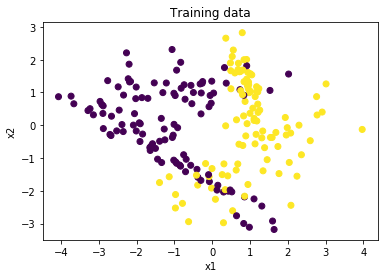

In [6]:
# Plot training data
plt.scatter(X_train[:,0], X_train[:,1], c = y_train)
# Title
plt.title('Training data')
# Axes
plt.xlabel('x1')
plt.ylabel('x2')

In [7]:
# Function to compute distance
def distances_func(points, pred_point, labels, k):
    # Distances between all points (dist, index, label)
    distances = [[np.linalg.norm(point-pred_point), index, label] for index, point, label in zip(range(len(labels)), points, labels)]
    # Sort descending and choose only k values
    return np.array(sorted(distances)[:k])

In [8]:
# List to grab final labels
final_labels = []
# Choose k number
k = 21

# Train and test model
for test_sample in X_test:
    # Distance between each test and training point
    distances = distances_func(X_train, test_sample, y_train, k)
    # Count number of points in each class
    unique, counts = np.unique(distances[:,-1], return_counts=True)
    # Choose class with more points around
    final_labels.append(unique[np.argmax(counts)])
# Equals labels
equals = np.equal(final_labels, y_test)
# Accuracy
acc = np.mean(equals.astype(int))

In [9]:
# Show accuracy
print('Accuracy: ', acc)

Accuracy:  0.9222222222222223


In [10]:
# Point to predict
pred = [0.5, 1.5]

Text(0, 0.5, 'x2')

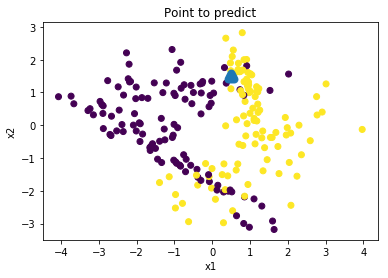

In [11]:
# Plot training data
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
# Plot point to predict
plt.scatter(pred[0], pred[1], marker = '^', linewidths=8)
# Title
plt.title('Point to predict')
# Axes
plt.xlabel('x1')
plt.ylabel('x2')

In [12]:
# Distances bewtween k points and pred
distances = distances_func(X_train, pred, y_train, k)

In [13]:
# Count number of points in each class
unique, counts = np.unique(distances[:,-1], return_counts=True)

In [14]:
# Choose class with more points around
final_label = unique[np.argmax(counts)]

In [15]:
# Colors for points
colors = ['b', 'g', 'r', 'c', 'm', 'y' ,'k']
# Select the number of colors equal to the number of classes
colors = colors[:n_class]

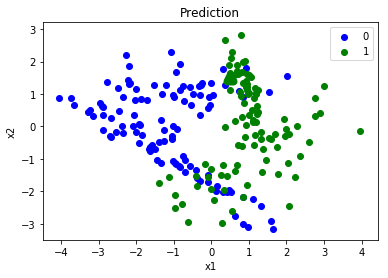

In [16]:
# Plot colored training data
for i in range(n_class):
    # Only point for current class
    data = X_train[y_train == i]
    # Plot training data for current class
    plt.scatter(data[:,0], data[:,1], color=colors[i], label=i)
# Plot colored prediction
plt.scatter(pred[0], pred[1], c =colors[int(final_label)], marker = '^', linewidths=8)
# Title
plt.title('Prediction')
# Axes
plt.xlabel('x1')
plt.ylabel('x2')
# Show legend
plt.legend()

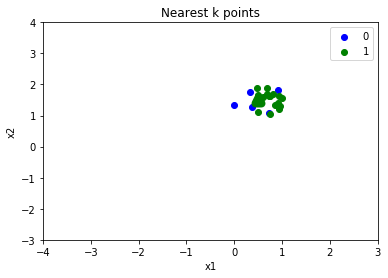

In [22]:
# Axes limits
plt.xlim(-4,3)
plt.ylim(-3,4)
# Choose nearest k points
pred_points = X_train[distances[:,1].astype(np.int32)]
preds_labels = y_train[distances[:,1].astype(np.int32)]
#Plot colored training data
for i in range(n_class):
    # Only the nearest k points for current class
    data = pred_points[preds_labels == i]
    # Plot the nearest k points for current class
    plt.scatter(data[:,0], data[:,1], color=colors[i], label=i)
# Plot predicion
plt.scatter(pred[0], pred[1], c = colors[int(final_label)], marker = '^', linewidths=8)
# Title
plt.title('Nearest k points')
# Axes
plt.xlabel('x1')
plt.ylabel('x2')
# Show legend
plt.legend()

# KNN  - Sklearn

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
# Create KNN model
knn = KNeighborsClassifier(21)
# Train model
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=21, p=2,
           weights='uniform')

In [20]:
# Predcition
predict = knn.predict(np.reshape(pred, (1,-1)))

In [21]:
# Predicted class
predict[0]

1